In [43]:
import numpy as np
import keras
keras.__version__
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics
import matplotlib.pyplot as plt
from keras.datasets import imdb 

In [2]:
#load_data

In [3]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [4]:
first_in_train_data=train_data[0]
first_in_train_data

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
def vectorize_maxwords(maxwords,uniquewords=10000):
    #create an all-zero matrix of shape(len(maxwords),uniqewords)
    results=np.zeros((len(maxwords),uniquewords))#1by10k matrix with all elements=0
    for row,column in enumerate(maxwords):
        results[row,column]=1.#set specific indices of results[row,columns] to 1s
    print(results)
    return results

In [6]:
x_train=vectorize_maxwords(train_data)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
x_test=vectorize_maxwords(test_data)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [9]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
#FIRST REVIEW IN X_TRAIN [POST VECTORIZATION]

In [11]:
first_in_x_train =  x_train[0]
first_in_x_train.shape

(10000,)

In [12]:
# NOW ITS TURN TO VECTORIZE LABELS

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
y_train[0]

1.0

In [15]:
y_test[0]

0.0

In [16]:
# THE MODEL

In [17]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [18]:
#USING LOSSES AND METRICS

In [19]:
from keras import losses
from keras import metrics

In [20]:
#COFIGURATION THE OPTIMIZER
#from keras import optimizers
from tensorflow.keras import optimizers
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.001), metrics=['acc'])

In [21]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

C:\Users\SURESH A\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [22]:
#VALIDATION SETS:X_TRAIN

In [23]:
x_val=x_train[:10000] #UP TO 10000
partial_x_train=x_train[10000:]# ABOVE 10000:10000 WILL BE HERE:TOTAL=15K

In [24]:
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [25]:
#LETS EXECUTE THE MODEL

In [26]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=10,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/10
30/30 [==============================] - 647s 16s/step - loss: 0.4988 - binary_accuracy: 0.7911 - val_loss: 0.3628 - val_binary_accuracy: 0.8773
Epoch 2/10
30/30 [==============================] - 67s 2s/step - loss: 0.2839 - binary_accuracy: 0.9080 - val_loss: 0.3174 - val_binary_accuracy: 0.8743
Epoch 3/10
30/30 [==============================] - 13s 450ms/step - loss: 0.2091 - binary_accuracy: 0.9305 - val_loss: 0.3083 - val_binary_accuracy: 0.8748
Epoch 4/10
30/30 [==============================] - 1s 51ms/step - loss: 0.1652 - binary_accuracy: 0.9474 - val_loss: 0.2788 - val_binary_accuracy: 0.8890
Epoch 5/10
30/30 [==============================] - 1s 35ms/step - loss: 0.1332 - binary_accuracy: 0.9569 - val_loss: 0.3097 - val_binary_accuracy: 0.8789
Epoch 6/10
30/30 [==============================] - 1s 23ms/step - loss: 0.1092 - binary_accuracy: 0.9667 - val_loss: 0.3149 - val_binary_accuracy: 0.8833
Epoch 7/10
30/30 [==============================] - 1s 22ms/step - l

In [27]:
#WHAT IS STORED IN HISTORY?

In [28]:
history_dict = history.history
history_dict# all ** values are stored
history_dict.keys()


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [29]:
#training and validation accuracy

In [30]:
import matplotlib.pyplot as plt

In [32]:
acc=history.history['binary_accuracy']
val_acc=history.history['val_binary_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

In [33]:
#accuracy

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

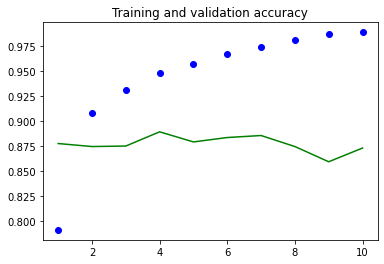

In [44]:
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'g',label='validation acc')
plt.title('Training and validation accuracy')
plt.xlable('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
#Training and validation loss

In [36]:
#loss

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

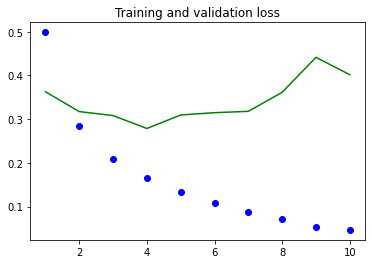

In [41]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'g',label='validation loss')
plt.title('Training and validation loss')
plt.xlable('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
#apply all 25k train and test

In [46]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [47]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

results


Epoch 1/4
49/49 [==============================] - 396s 3s/step - loss: 0.4754 - accuracy: 0.8188
Epoch 2/4
49/49 [==============================] - 2s 45ms/step - loss: 0.2725 - accuracy: 0.9088
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2080 - accuracy: 0.9270 0s - loss: 0.2112 - ac - ETA: 0s - loss: 0.2076 - accuracy: 
Epoch 4/4
49/49 [==============================] - 1s 24ms/step - loss: 0.1724 - accuracy: 0.9380
